**Target Variable(s): Executive Function Scores**

1. Interference
2. Working Memory
3. Cognitive Flexibility

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [48]:
data = pd.ExcelFile('/Users/springboard/Desktop/Capstone-Project/Obesity.xlsx')

df = data.parse('Full sample_EF_excel')

In [49]:
# Drop 27 rows corresponding to 27 missing values

df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 512
Data columns (total 25 columns):
Reference_no              486 non-null int64
Actual_age_C              486 non-null float64
Sex                       486 non-null int64
Weight                    486 non-null float64
Height_meter              486 non-null float64
BMI                       486 non-null float64
BMI_for_age               486 non-null float64
Physical_fitness_score    486 non-null float64
PFS_CAT                   486 non-null int64
Breakfast                 486 non-null int64
Lunch                     486 non-null int64
Dinner                    486 non-null int64
PA_total_score            486 non-null float64
PA_CAT                    486 non-null int64
Sleep_weekdays            486 non-null float64
Sleep_weekend             486 non-null float64
Sleep_percent             486 non-null float64
Global_sleep_CAT          486 non-null int64
Household_size            486 non-null float64
Income_CAT        

# Linear Regression (using sklearn)

**Target Variable #1: Interference**

In [50]:
# Create feature and target arrays

X = df_cleaned.drop(['Interference_score_ALL', 'WM_total', 'CF_total'], axis=1).values
y = df_cleaned['Interference_score_ALL'].values

In [51]:
# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [52]:
# Fit the regressor to the training data 

reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [53]:
# Predict on the test data

y_pred = reg.predict(X_test)

In [54]:
# R^2 and RMSE

print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.029322066117877906
Root Mean Squared Error: 6.8112600391431934


In [55]:
cv_scores_int = cross_val_score(reg, X, y, cv=5)
print("Average 5-Fold CV Score for Interference: {}".format(np.mean(cv_scores_int)))

Average 5-Fold CV Score for Interference: -0.039754257345681145


**- Lasso Regression**

In [56]:
# Lasso Regression

from sklearn.linear_model import Lasso

lasso_int = Lasso(alpha=0.1, normalize=True)
lasso_int.fit(X_train, y_train)
lasso_int_pred = lasso_int.predict(X_test)
lasso_int.score(X_test, y_test)

-9.938096219164194e-05

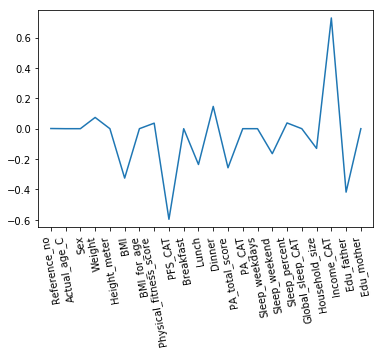

In [57]:
names = df_cleaned.drop(['Interference_score_ALL', 'WM_total', 'CF_total'], axis=1).columns

lasso_graph_1 = Lasso(alpha=0.1)
lasso_coef_1 = lasso_graph_1.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef_1)
_ = plt.xticks(range(len(names)), names, rotation=100)
_ = plt.margins(0.04)
plt.show()

It appears as if 'PFS_CAT' and 'Income_CAT' are the two most important features when predicting Interference scores.

In [58]:
# Recreate feature and target arrays (based on Lasso analysis)

X_lasso_int = df_cleaned[['PFS_CAT', 'Income_CAT']].values
y_lasso_int = df_cleaned['Interference_score_ALL'].values

In [59]:
# Split into training and test sets

X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_lasso_int, y_lasso_int, test_size=0.2, random_state=50)

In [60]:
# Fit the regressor to the training data 

reg_int = LinearRegression(normalize=True)
reg_int.fit(X_train_int, y_train_int)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [61]:
# Predict on the test data

y_pred_int = reg_int.predict(X_test_int)

In [62]:
# R^2 and RMSE

print("R^2: {}".format(reg_int.score(X_test_int, y_test_int)))
rmse = np.sqrt(mean_squared_error(y_test_int, y_pred_int))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.0179516842666404
Root Mean Squared Error: 6.6530110850223565


In [63]:
cv_scores_int1 = cross_val_score(reg_int, X_lasso_int, y_lasso_int, cv=5)
print("Average 5-Fold CV Score for Interference: {}".format(np.mean(cv_scores_int1)))

Average 5-Fold CV Score for Interference: 0.003012455371828859


In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

m_int = ols('Interference_score_ALL ~ BMI + PFS_CAT + Income_CAT + Edu_father',df_cleaned).fit()
print(m_int.summary())

                              OLS Regression Results                              
Dep. Variable:     Interference_score_ALL   R-squared:                       0.023
Model:                                OLS   Adj. R-squared:                  0.015
Method:                     Least Squares   F-statistic:                     2.846
Date:                    Thu, 02 May 2019   Prob (F-statistic):             0.0236
Time:                            12:30:32   Log-Likelihood:                -1597.8
No. Observations:                     486   AIC:                             3206.
Df Residuals:                         481   BIC:                             3227.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

The p-values (under P>|t| in the coefficient table) for two variables of interest are less than α = 0.05. As such, it can be inferred that BMI and income category are statistically significant predictors of Interference scores. 

The regression coefficient of -0.126 for BMI means that on average, a one-level increase in BMI is associated with a 0.126-point decrease in Interference score. The confidence interval gives a range of possible values for this average change (a score between 1.080 and 10.110). 

The regression coefficient of 1.178 for Income_CAT means that on average, a one-level increase in income category is associated with a 1.178-point increase in Interference score. The confidence interval gives a range of possible values for this average change (a score between 0.324 and 2.032). 

The average interference score, if all independent variables = 0, would be 5.595.

The F-statistic = 2.846, and its corresponding p-value = 0.0236. This model is statistically sound. 

R^2 = 0.023. In general, the R^2 value is the percentage of variance in the response variable. In this case, R^2 signifies that 2.3% of Interference can be explained by BMI and income category. 

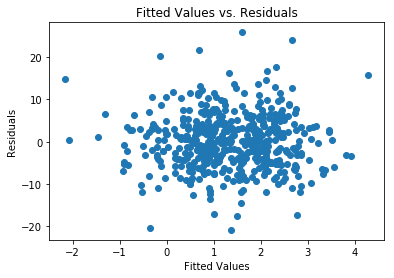

In [65]:
plt.scatter(m_int.fittedvalues, m_int.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')

plt.show()

**Target Variable #2: Working Memory**

In [66]:
# Create target array

y_WM = df_cleaned['WM_total'].values

In [67]:
# Split into training and test sets

X_train_WM, X_test_WM, y_train_WM, y_test_WM = train_test_split(X, y_WM, test_size = 0.2, random_state=100)

In [68]:
# Fit the regressor to the training data 

reg_WM = LinearRegression(normalize=True)
reg_WM.fit(X_train_WM, y_train_WM)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [69]:
# Predict on the test data

y_pred_WM = reg.predict(X_test_WM)

In [70]:
# R^2 and RMSE

print("R^2: {}".format(reg_WM.score(X_test_WM, y_test_WM)))
rmse = np.sqrt(mean_squared_error(y_test_WM, y_pred_WM))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.10672117878391663
Root Mean Squared Error: 16.35041147922245


In [71]:
cv_scores_WM = cross_val_score(reg_WM, X, y_WM, cv=5)
print("Average 5-Fold CV Score for Working Memory: {}".format(np.mean(cv_scores_WM)))

Average 5-Fold CV Score for Working Memory: 0.010540435513118984


**- Lasso Regression**

In [72]:
# Lasso Regression

lasso_WM = Lasso(alpha=0.1, normalize=True)
lasso_WM.fit(X_train_WM, y_train_WM)
lasso_WM_pred = lasso_WM.predict(X_test_WM)
lasso_WM.score(X_test_WM, y_test_WM)

-0.0009559612689187258

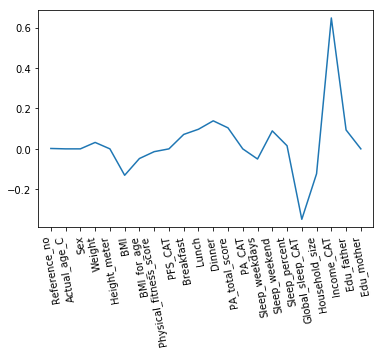

In [73]:
lasso_graph_2 = Lasso(alpha=0.1)
lasso_coef_2 = lasso_graph_2.fit(X, y_WM).coef_
_ = plt.plot(range(len(names)), lasso_coef_2)
_ = plt.xticks(range(len(names)), names, rotation=100)
_ = plt.margins(0.04)
plt.show()

It appears as if 'Global_sleep_CAT' and 'Income_CAT' are the two most important features when predicting Working Memory scores.

In [74]:
# Recreate feature and target arrays (based on Lasso analysis)

X_lasso_WM = df_cleaned[['Global_sleep_CAT', 'Income_CAT']].values
y_lasso_WM = df_cleaned['WM_total'].values

# Split into training and test sets

X_train_WM1, X_test_WM1, y_train_WM1, y_test_WM1 = train_test_split(X_lasso_WM, y_lasso_WM, test_size=0.15, random_state=100)

# Fit the regressor to the training data 

reg_WM1 = LinearRegression(normalize=True)
reg_WM1.fit(X_train_WM1, y_train_WM1)

# Predict on the test data

y_pred_WM1 = reg_WM1.predict(X_test_WM1)

# R^2 and RMSE

print("R^2: {}".format(reg_WM1.score(X_test_WM1, y_test_WM1)))
rmse = np.sqrt(mean_squared_error(y_test_WM1, y_pred_WM1))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.09394754879919331
Root Mean Squared Error: 4.023163865087655


In [75]:
cv_scores_WM1 = cross_val_score(reg_WM1, X_lasso_WM, y_lasso_WM, cv=5)
print("Average 5-Fold CV Score for Working Memory: {}".format(np.mean(cv_scores_WM1)))

Average 5-Fold CV Score for Working Memory: 0.04277499365946273


In [76]:
m_WM = ols('WM_total ~ BMI + Dinner + PA_total_score + Sleep_weekend + Global_sleep_CAT + Income_CAT',df_cleaned).fit()
print(m_WM.summary())

                            OLS Regression Results                            
Dep. Variable:               WM_total   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     6.564
Date:                Thu, 02 May 2019   Prob (F-statistic):           1.12e-06
Time:                        12:30:32   Log-Likelihood:                -1313.9
No. Observations:                 486   AIC:                             2642.
Df Residuals:                     479   BIC:                             2671.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.2956      1.460  

The p-values (under P>|t| in the coefficient table) for three of six independent variables are less than α = 0.05. 
As such, it can be inferred that the number of dinners, global sleep category, and income category are statistically significant predictors of Working Memory scores.

The regression coefficient of 0.215 for Dinner means that on average, a one-level increase in number of dinners consumed is associated with a 0.215-point increase in Working Memory score. The confidence interval gives a range of possible values for this average change (a score between 0.068 and 0.361).

The regression coefficient of -1.024 for Global_sleep_CAT means that on average, a one-level increase in global sleep category is associated with a 1.024-point decrease in Working Memory score. The confidence interval gives a range of possible values for this average change (a score between -1.763 and -0.284).

The regression coefficient of 0.807 for Income_CAT means that on average, a one-level increase in income category is associated with a 0.807-point decrease in Working Memory score. The confidence interval gives a range of possible values for this average change (a score between 0.398 and 1.215).

The average working memory score, if all independent variables = 0, would be 15.30.

The F-statistic = 6.564, and its corresponding p-value = 1.12e-06. This model is statistically sound.

R^2 = 0.076. 7.6% of Working Memory can be explained number of dinners, global sleep category, and income category.  

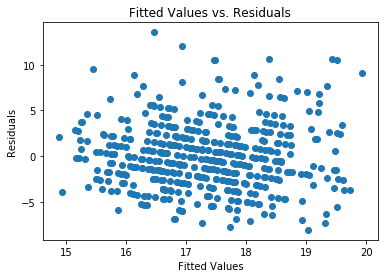

In [77]:
plt.scatter(m_WM.fittedvalues, m_WM.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')

plt.show()

**Target Variable #3: Cognitive Flexibility**

In [78]:
# Create target array

y_CF = df_cleaned['CF_total'].values

In [79]:
# Split into training and test sets

X_train_CF, X_test_CF, y_train_CF, y_test_CF = train_test_split(X, y_CF, test_size = 0.1, random_state=50)

In [103]:
# Fit the regressor to the training data 

reg_CF = LinearRegression(normalize=True)
reg_CF.fit(X_train_CF, y_train_CF)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [100]:
# Predict on the test data

y_pred_CF = reg_CF.predict(X_test_CF)

In [101]:
# R^2 and RMSE

print("R^2: {}".format(reg_CF.score(X_test_CF, y_test_CF)))
rmse = np.sqrt(mean_squared_error(y_test_CF, y_pred_CF))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.022702976365233773
Root Mean Squared Error: 19.818366018324106


In [102]:
cv_scores_CF = cross_val_score(reg_CF, X, y_CF, cv=5)
print("Average 5-Fold CV Score for Cognitive Flexibility: {}".format(np.mean(cv_scores_CF)))

Average 5-Fold CV Score for Cognitive Flexibility: -0.1159837997155361


**- Lasso Regression**

In [84]:
# Lasso Regression

lasso_CF = Lasso(alpha=0.1, normalize=True)
lasso_CF.fit(X_train_CF, y_train_CF)
lasso_CF_pred = lasso_CF.predict(X_test_CF)
lasso_WM.score(X_test_CF, y_test_CF)

-0.402779691503107

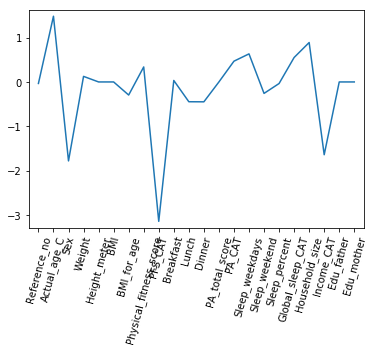

In [85]:
lasso_graph_3 = Lasso(alpha=0.1)
lasso_coef_3 = lasso_graph_3.fit(X, y_CF).coef_
_ = plt.plot(range(len(names)), lasso_coef_3)
_ = plt.xticks(range(len(names)), names, rotation=75)
_ = plt.margins(0.03)
plt.show()

'Actual_age_C, 'Sex', 'PFS_CAT', 'Household_size', and 'Income_CAT' are the most important features when predicting Cognitive Flexibility scores.

In [86]:
# Recreate feature and target arrays (based on Lasso analysis)

X_lasso_CF = df_cleaned[['Actual_age_C', 'Sex', 'PFS_CAT', 'Household_size', 'Income_CAT']].values
y_lasso_CF = df_cleaned['CF_total'].values

# Split into training and test sets

X_train_CF1, X_test_CF1, y_train_CF1, y_test_CF1 = train_test_split(X_lasso_CF, y_lasso_CF, test_size=0.3, random_state=50)

# Fit the regressor to the training data 

reg_CF1 = LinearRegression(normalize=True)
reg_CF1.fit(X_train_CF1, y_train_CF1)

# Predict on the test data

y_pred_CF1 = reg_CF1.predict(X_test_CF1)

# R^2 and RMSE

print("R^2: {}".format(reg_CF1.score(X_test_CF1, y_test_CF1)))
rmse = np.sqrt(mean_squared_error(y_test_CF1, y_pred_CF1))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.05322700346960763
Root Mean Squared Error: 17.686713727959347


In [87]:
cv_scores_CF1 = cross_val_score(reg_CF1, X_lasso_CF, y_lasso_CF, cv=10)
print("Average 5-Fold CV Score for Working Memory: {}".format(np.mean(cv_scores_CF1)))

Average 5-Fold CV Score for Working Memory: -0.05806307633896213


In [88]:
m_CF = ols('CF_total ~ Actual_age_C + Sex + PFS_CAT + Household_size + Income_CAT',df_cleaned).fit()
print(m_CF.summary())

                            OLS Regression Results                            
Dep. Variable:               CF_total   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.610
Date:                Thu, 02 May 2019   Prob (F-statistic):           0.000406
Time:                        12:30:33   Log-Likelihood:                -2119.9
No. Observations:                 486   AIC:                             4252.
Df Residuals:                     480   BIC:                             4277.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         62.6695     10.618      5.

The p-values (under P>|t| in the coefficient table) for three of out five independent variables are less than α = 0.05. As such, it can be inferred that age, sex, and income category are statistically significant predictors of Cognitive Flexibility scores.

The regression coefficient of -2.10 for Actual_age_C means that on average, a one-year increase in age is associated with a 2.10-point decrease in Cognitive Flexibility score. The confidence interval gives a range of possible values for this average change (a score between -3.422 and -0.778).


The regression coefficient of -4.37 for Sex (where 1 = male, 2 = female) means that on average, a one-level increase in sex is associated with a 4.37-point decrease in Cognitive Flexibility score. 
Another way to word this finding is as follows: females show a 4.37-point decrease in Cognitive Flexibility scores. 
The confidence interval gives a range of possible values for this average change (a score between -8.253 and -0.487).

The regression coefficient of -2.157 for Income_CAT means that on average, a one-level increase in income category is associated with a 2.157-point decrease in Cognitive Flexibility score. The confidence interval gives a range of possible values for this average change (a score between -4.298 and -0.016).

The average cognitive flexibility score if all independent variables = 0 would be 62.67.

The F-statistic = 4.610, and its corresponding p-value = 0.000406. This model is statistically sound.

R^2 = 0.046. 4.6% of Cognitive Flexibility can be explained number of age, sex, and income category.

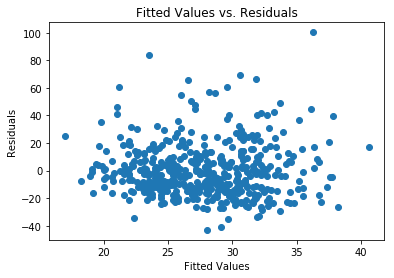

In [89]:
plt.scatter(m_CF.fittedvalues, m_CF.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')

plt.show()

# GridSearching

In [90]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Range of alpha values to test 

alphas = np.array([0.1, 0.01, 0.001, 0.0001, 0, 1, 10, 100, 1000, 10000, 100000])

# GridSearch - Interference Score

ridge_obj = Ridge()
grid_INT = GridSearchCV(estimator=ridge_obj, param_grid=dict(alpha=alphas), cv=5)
grid_INT.fit(X_train, y_train)

print('Best Score (Interference): ' + str(grid_INT.best_score_))
print('Best Alpha: ' + str(grid_INT.best_estimator_.alpha))

Best Score (Interference): -0.03427710129945115
Best Alpha: 1000.0


/Users/springboard/anaconda3/envs/ProjectEnv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [98]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Range of alpha values to test 

alphas = np.array([0.1, 0.01, 0.001, 0.0001, 0, 1, 10, 100, 1000, 10000, 100000])

# GridSearch - Interference Score

lasso_obj = Lasso(normalize=False)
grid_INT = GridSearchCV(estimator=lasso_obj, param_grid=dict(alpha=alphas), cv=5)
grid_INT.fit(X_train, y_train)

print('Best Score (Interference): ' + str(grid_INT.best_score_))
print('Best Alpha: ' + str(grid_INT.best_estimator_.alpha))

/Users/springboard/anaconda3/envs/ProjectEnv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/springboard/anaconda3/envs/ProjectEnv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/springboard/anaconda3/envs/ProjectEnv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/springboard/anaconda3/envs/ProjectEnv/lib/python3.7/site-packages/

Best Score (Interference): -0.03206492756417301
Best Alpha: 100.0


/Users/springboard/anaconda3/envs/ProjectEnv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [94]:
grid_INT.best_estimator_.coef_

array([-0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,
       -0., -0., -0.,  0., -0., -0.,  0., -0.,  0.])

In [97]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=[y.mean() for _ in y_test])

-6.334234098881453e-05

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Range of alpha values to test 

alphas = np.array([0.1, 0.01, 0.001, 0.0001, 0, 1, 10, 100, 1000, 10000, 100000])

# GridSearch - Interference Score

lasso_obj = Lasso(normalize=False)
grid_INT = GridSearchCV(estimator=lasso_obj, param_grid=dict(alpha=alphas), cv=5)
grid_INT.fit(X_train, y_train)

print('Best Score (Interference): ' + str(grid_INT.best_score_))
print('Best Alpha: ' + str(grid_INT.best_estimator_.alpha))

# Random Forest Regression

In [91]:
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [107]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Range of alpha values to test 

max_depth = np.array([2, 3, 5, 10])

# GridSearch - Interference Score

rf_obj = RandomForestRegressor()
rf_INT = GridSearchCV(estimator=rf_obj, param_grid=dict(max_depth=max_depth, n_estimators=[10, 50, 100, 200]), cv=5)
rf_INT.fit(X_train, y_train)

print('Best Score (Interference): ' + str(rf_INT.best_score_))
print('Best Alpha: ' + str(rf_INT.best_estimator_.max_depth))

/Users/springboard/anaconda3/envs/ProjectEnv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score (Interference): -0.040081015586138725
Best Alpha: 2


In [108]:
rf_INT.cv_results_

/Users/springboard/anaconda3/envs/ProjectEnv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/springboard/anaconda3/envs/ProjectEnv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/springboard/anaconda3/envs/ProjectEnv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnin

{'mean_fit_time': array([0.01835289, 0.07399397, 0.14250736, 0.27721114, 0.01708112,
        0.07753067, 0.15277534, 0.30561218, 0.01992631, 0.09743967,
        0.1931891 , 0.39501696, 0.03146763, 0.14678273, 0.2889914 ,
        0.60620375]),
 'std_fit_time': array([0.01030698, 0.01080188, 0.00557082, 0.01252871, 0.00311198,
        0.0080892 , 0.00681986, 0.0095649 , 0.0017918 , 0.00525791,
        0.00700959, 0.00587992, 0.00476021, 0.002886  , 0.00752868,
        0.02213852]),
 'mean_score_time': array([0.0018888 , 0.00503507, 0.01376433, 0.01352367, 0.00126448,
        0.00384493, 0.00804706, 0.01625757, 0.00171185, 0.00310941,
        0.00588613, 0.01419373, 0.00177822, 0.00442004, 0.00735073,
        0.01449757]),
 'std_score_time': array([0.00051511, 0.00243025, 0.00684458, 0.00252797, 0.0001236 ,
        0.00139865, 0.0017241 , 0.00399198, 0.00057759, 0.0001304 ,
        0.00040953, 0.00188144, 0.00056289, 0.00128092, 0.0017389 ,
        0.0025055 ]),
 'param_max_depth': masked